#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Good Luck!

### **Shaker Baker Solution**

##### 1. **Basic Data Exploration**

In [4]:
# df shape (rows , columns)
dfShape=df.shape
print("number of rows", dfShape[0])
print("number of column", dfShape[1])

number of rows 148654
number of column 13


In [5]:
# data collection year
min_year = df['Year'].min()
max_year = df['Year'].max()
print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 2011
Maximum Year: 2014


In [6]:
# dropping Non informative column
df.drop('Id',axis=1,inplace=True)

In [7]:
data=[]
for col in df:
    colData=df[col]
    colName=col
    colDataType=colData.dtype
    numberOfNulls=colData.isnull().sum()
    mostFrequent=colData.mode()
    mostFrequent=mostFrequent[0] if len(mostFrequent) > 0 else np.NaN

    colCount = colMean = colMedian = colStd = colMin = colMax = colUniqueCount =  np.NaN
    if(colDataType=="int64"or  colDataType=="float64"):# numerical columns
        colCount= colData.count()
        colMean= colData.mean()
        colMedian= colData.median()
        colStd= colData.std()
        colMin= colData.min()
        colMax= colData.max()
    else : # category columns
        colUniqueCount= colData.nunique()

    data.append({"NumberOfNulls":numberOfNulls,
                "DataType":colDataType,
                "Count":colCount,
                "Mean":colMean,
                "Median":colMedian,
                "Std":colStd,
                "Min":colMin,
                "Max":colMax,
                "MostFrequent":mostFrequent,
                "NumberOfUnique ":colUniqueCount
                })
    
pd.DataFrame(data,columns=data[0].keys(),index=df.columns)

c:\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,NumberOfNulls,DataType,Count,Mean,Median,Std,Min,Max,MostFrequent,NumberOfUnique
EmployeeName,0,object,NaN,NaN,NaN,NaN,NaN,NaN,Kevin Lee,110811.0
JobTitle,0,object,NaN,NaN,NaN,NaN,NaN,NaN,Transit Operator,2159.0
BasePay,609,float64,148045.0,66325.448840,65007.45,42764.635495,-166.01,319275.01,0.0,NaN
OvertimePay,4,float64,148650.0,5066.059886,0.00,11454.380559,-0.01,245131.88,0.0,NaN
OtherPay,4,float64,148650.0,3648.767297,811.27,8056.601866,-7058.59,400184.25,0.0,NaN
Benefits,36163,float64,112491.0,25007.893151,28628.62,15402.215858,-33.89,96570.66,0.0,NaN
TotalPay,0,float64,148654.0,74768.321972,71426.61,50517.005274,-618.13,567595.43,0.0,NaN
TotalPayBenefits,0,float64,148654.0,93692.554811,92404.09,62793.533483,-618.13,567595.43,7959.18,NaN
Year,0,int64,148654.0,2012.522643,2013.00,1.117538,2011.00,2014.00,2014,NaN
Notes,148654,float64,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

##### 2. **Descriptive Statistics**

In [8]:
# basic statistics for 'TotalPay'
salaryStatistics = df['TotalPay'].describe()
modeSalary = df['TotalPay'].mode()[0] 
minSalary =salaryStatistics['min']
maxSalary = salaryStatistics['max']
medianSalary = salaryStatistics['50%']
stdSalary = salaryStatistics['std']

print("Basic Statistics for TotalPay:")
print(salaryStatistics)
print(f"Mode Salary: {modeSalary}")
print(f"Salary Range: {maxSalary - minSalary}")
print(f"Median Salary: {medianSalary}")
print(f"Standard Deviation of Salary: {salaryStatistics['std']}")


Basic Statistics for TotalPay:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
Mode Salary: 0.0
Salary Range: 568213.56
Median Salary: 71426.60999999999
Standard Deviation of Salary: 50517.00527394987


---

##### 3. **Data Cleaning**

In [9]:
# dropping Notes and Status columns because these columns are filled only with NaN, and do not provide meaningful information
df.drop(["Notes", "Status"],axis=1,inplace=True)

In [10]:
# replace nulls with 0 so it won't effect the calculation of TotalPay and TotalPayBenefits
df['BasePay']=df['BasePay'].fillna(0)  
df['Benefits']=df['Benefits'].fillna(0)  


In [11]:
# removing the rows where EmployeeName and JobTitle columns were filled with Not provided, indicating missing or incomplete data (4 rows)
df.drop(df[(df['JobTitle'] == 'Not provided') & (df['EmployeeName'] == 'Not provided')].index, inplace=True)

---

##### 4. **Basic Data Visualization**

<Axes: xlabel='TotalPay', ylabel='Count'>

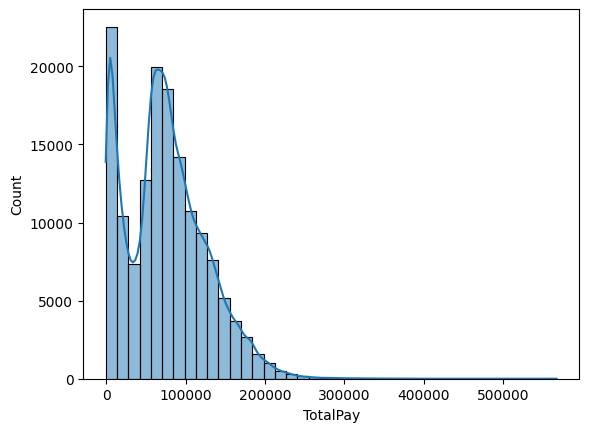

In [12]:
sns.histplot(df, fill=True, bins=40, kde=True, x='TotalPay')

In [13]:
# employees in different departments 
departmentsKeywords = {
    'IT Department': ['it', 'information technology', 'software', 'developer'],
    'Finance Department': ['finance', 'accountant', 'financial'],
    'Human Resources': ['hr','human resources' , 'executive contract','human services','public service','recreation leader'],
    'Police Department' : [ 'police','guard','sergeant','protective'],
    'Fire Department' : [ 'fire','battalion'],
    'Medical Department' : ['psychiatric','patient care','psychologist','mental', 'medical','nurse' , 'nursing','anesthetist','physician specialist','toxicologist','diagnostic imaging','incident support','pharmacist','physician','dentist'],
    'Maintenance And Engineering Department' : ['automotive','safety','splicer','welder','plumbing','building','electrical','water service','machinist', 'maintenance' ,'engineer','mechanic','electrician','train controller' ,'sewage','plumber','heating','ventilating','power','repair','sewer','construction','railway','sheet metal' ],
    'Law Department' : [ "sheriff's",'lieutenant','director','deputy chief' ,'sheriff','public defender','custodian','confidential chief','attorney','court','criminalist','law'],
    'Management Department' : ['clerk','svc','admin', 'dispatch', 'department head' , 'mayor' ,'manager','business'],
    'Communication Department' : [ 'communications' , 'radio','transmission','communication'],
}

# Function to classify job titles into departments
def classifyDepartment(job_title):
    for department, keywords in departmentsKeywords.items():
        if any(keyword in job_title.lower() for keyword in keywords):
            return department
    return 'other' 

# Creating a new column 'Department' based on job title classification
df['Department'] = df['JobTitle'].apply(classifyDepartment)
departmentCounts =df['Department'].value_counts()


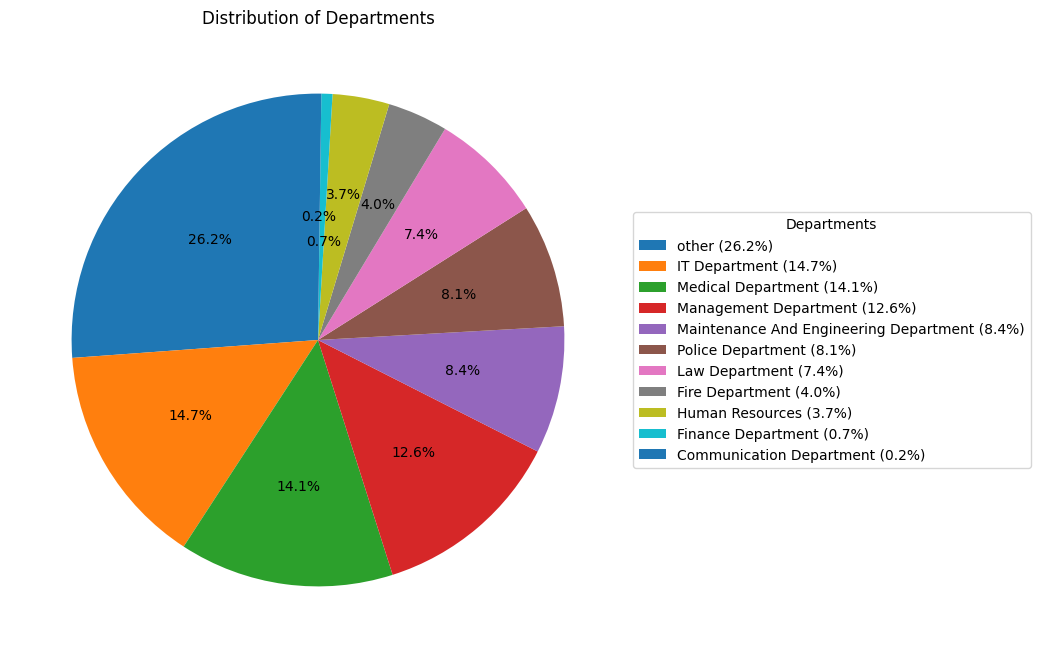

In [14]:
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(departmentCounts, labels=None, autopct='%1.1f%%', startangle=90)
autotexts[10]._y =+.5
autotexts[9]._y =+.4
percentages = (departmentCounts / departmentCounts.sum()) * 100
legendLabels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(departmentCounts.index, percentages)]
plt.legend(legendLabels, title='Departments', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Departments')
plt.show()

<Axes: title={'center': 'Top 10 Payed Jobs'}, xlabel='TotalPay', ylabel='JobTitle'>

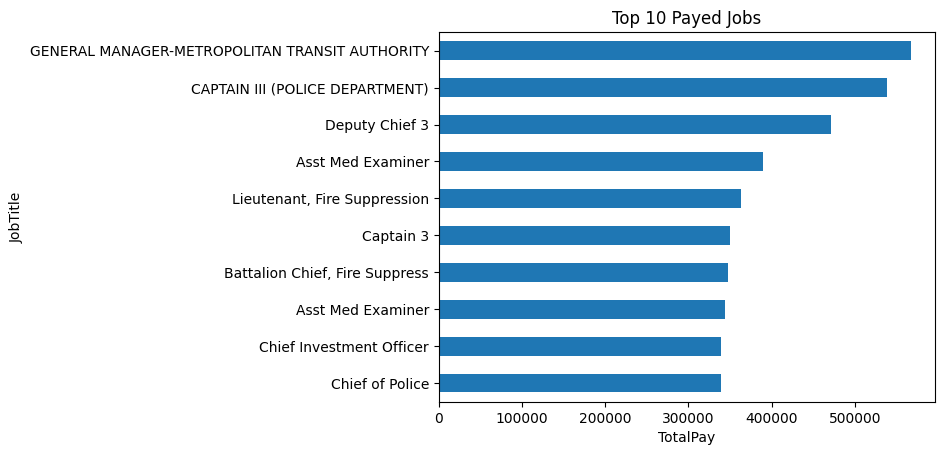

In [15]:
# Top 10 Payed jobs plot
top10PayedJobs = df[['JobTitle', 'TotalPay']].nlargest(10, 'TotalPay')[::-1]
top10PayedJobs.plot(kind='barh', x='JobTitle', y='TotalPay', legend=False ,title='Top 10 Payed Jobs' ,xlabel='TotalPay')

---

##### 5. **Grouped Analysis**

In [16]:
avgSalaryPerDepartment= df.groupby('Department')['TotalPay'].mean().sort_values(ascending=False)
avgSalaryPerDepartment

Department
Fire Department                           151685.812380
Police Department                         107437.154253
Communication Department                   98828.414393
Maintenance And Engineering Department     93372.247573
Law Department                             89862.504251
Medical Department                         73022.612742
Finance Department                         71414.783939
IT Department                              70914.874837
Management Department                      62768.135939
other                                      60938.130978
Human Resources                             9316.116067
Name: TotalPay, dtype: float64

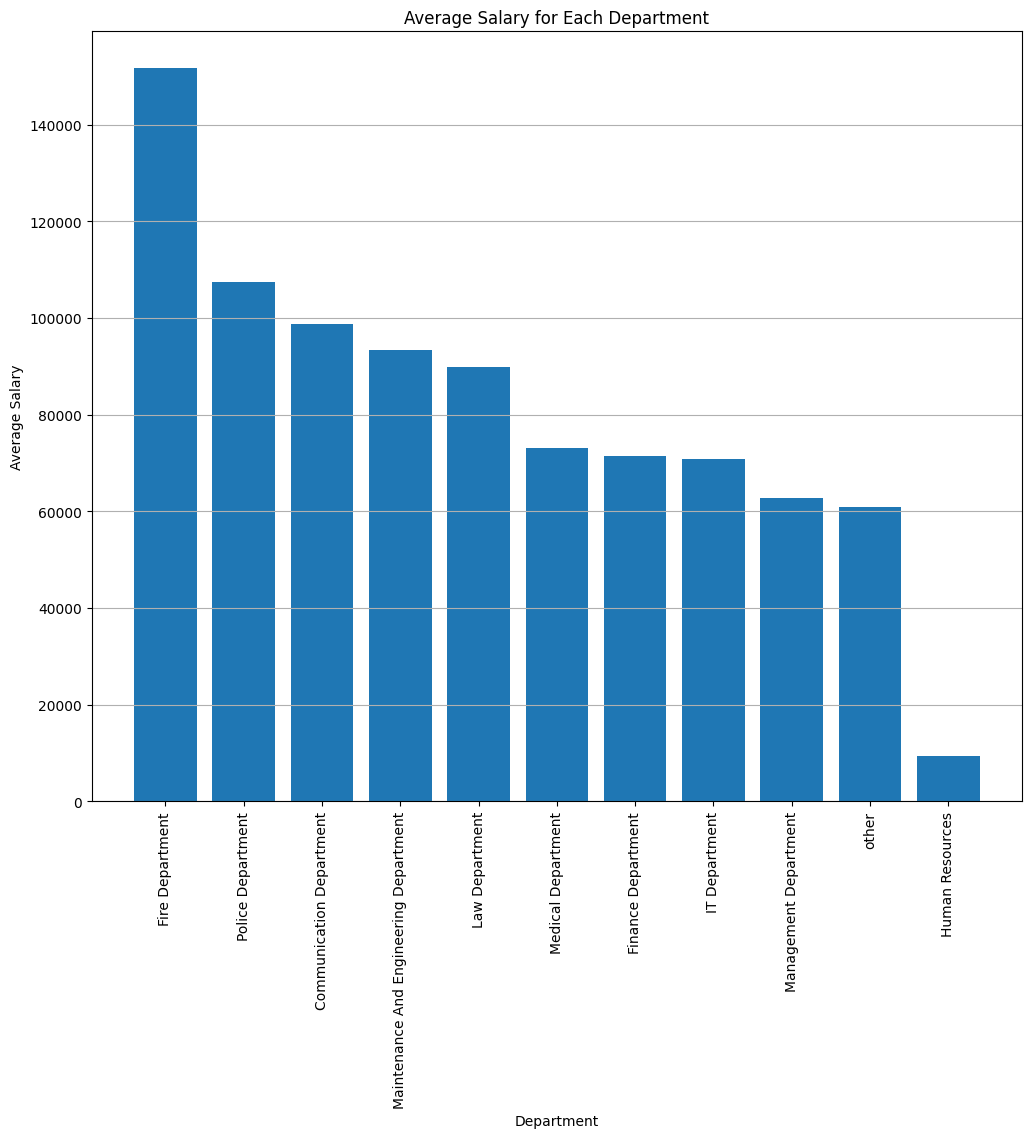

In [17]:
plt.figure(figsize=(12, 10))
plt.bar(avgSalaryPerDepartment.index,avgSalaryPerDepartment)
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary for Each Department')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [18]:
avgSalaryPerDepartmentPerYear = df.groupby(['Year', 'Department'])['TotalPay'].mean().reset_index()
avgSalaryPerDepartmentPerYear

,Year,Department,TotalPay
0,2011,Communication Department,93444.427955
1,2011,Finance Department,63410.711901
2,2011,Fire Department,145005.665483
3,2011,Human Resources,8934.653904
4,2011,IT Department,67975.671584
5,2011,Law Department,83638.039837
6,2011,Maintenance And Engineering Department,89448.083288
7,2011,Management Department,69471.947323
8,2011,Medical Department,72082.157414
9,2011,Police Department,107438.144747


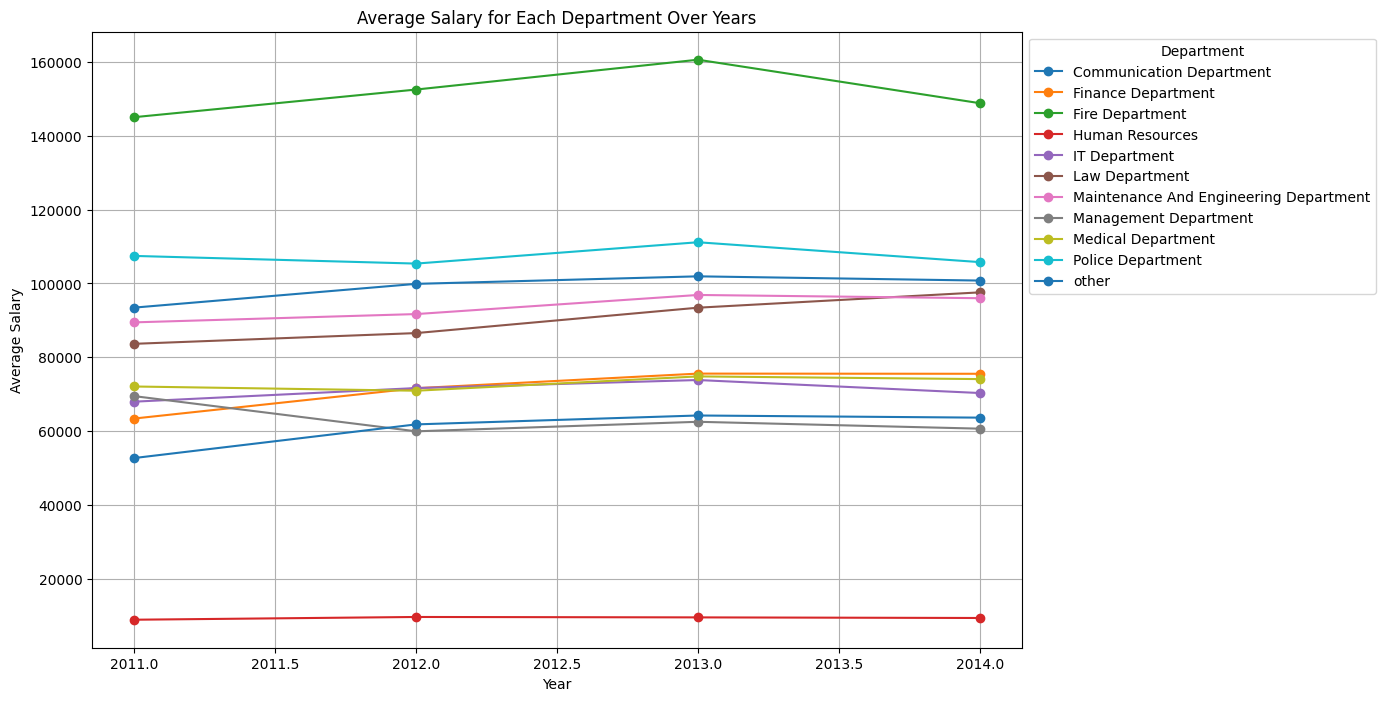

In [19]:
plt.figure(figsize=(12, 8))
for department in avgSalaryPerDepartmentPerYear['Department'].unique():
    department_data = avgSalaryPerDepartmentPerYear[avgSalaryPerDepartmentPerYear['Department'] == department]
    plt.plot(department_data['Year'], department_data['TotalPay'], label=department, marker='o')

plt.legend(title='Department', bbox_to_anchor=(1, 1))
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary for Each Department Over Years')
plt.grid(True)
plt.show()


---

##### 6. **Simple Correlation Analysis**

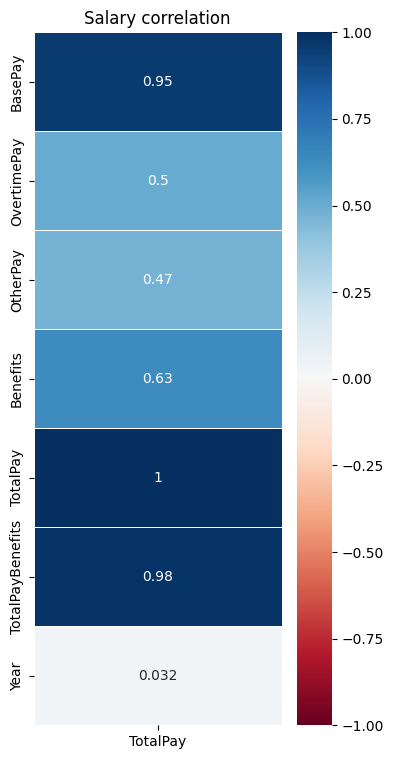

In [20]:
corr = df.select_dtypes(include=np.number).corr()
corrWithTarget = corr['TotalPay']
plt.figure(figsize = (4,9))
plt.title('Salary correlation')
sns.heatmap(corrWithTarget.to_frame(), cmap="RdBu", annot=True ,linewidths=.5, vmin=-1, vmax=1)
plt.show()

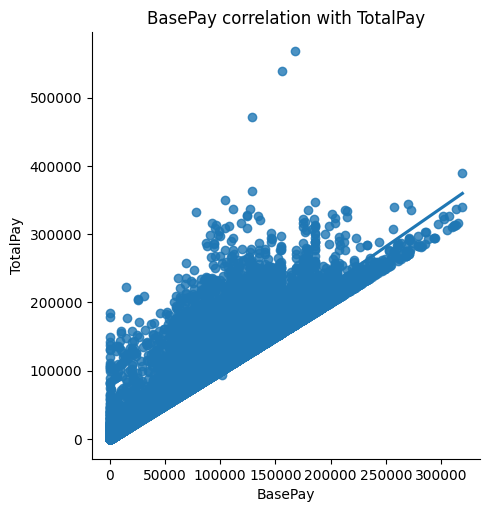

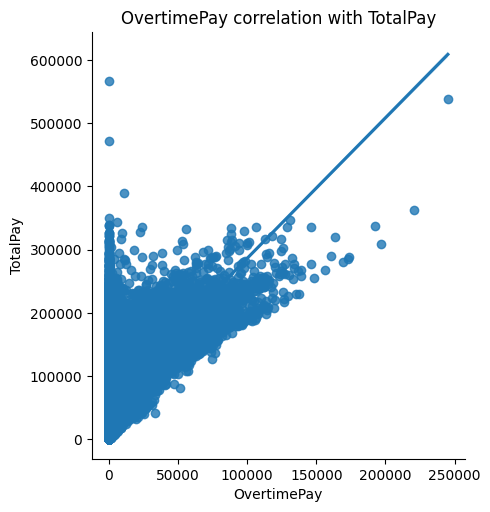

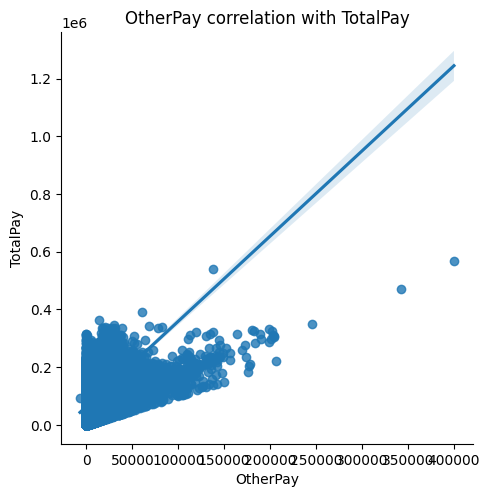

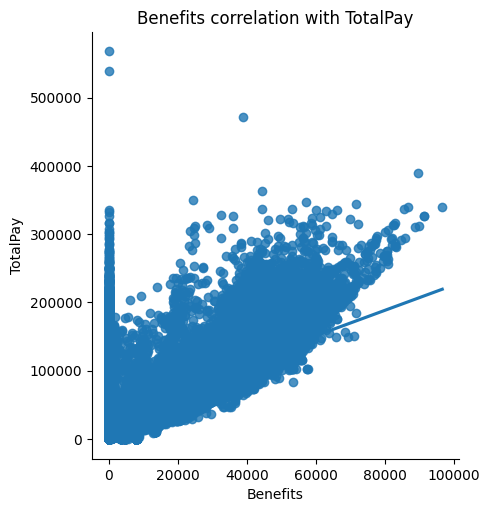

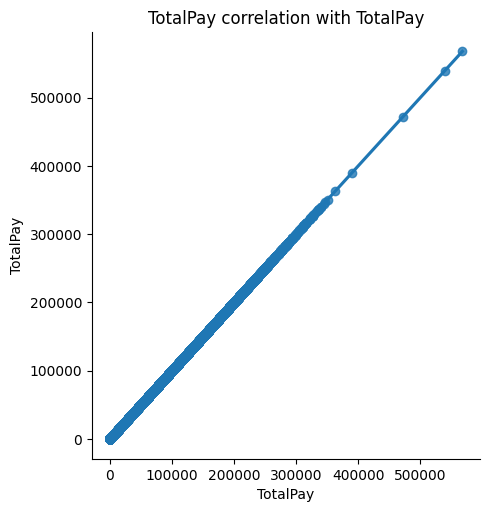

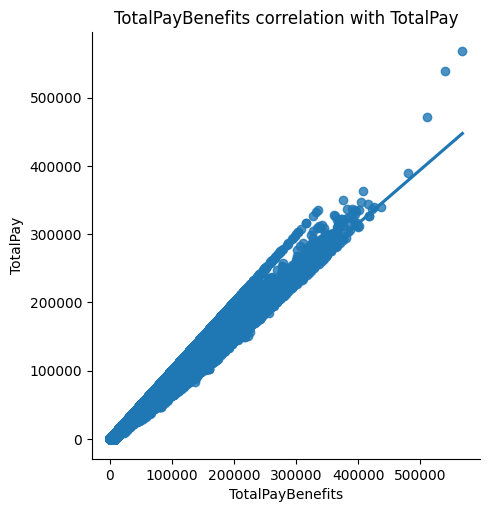

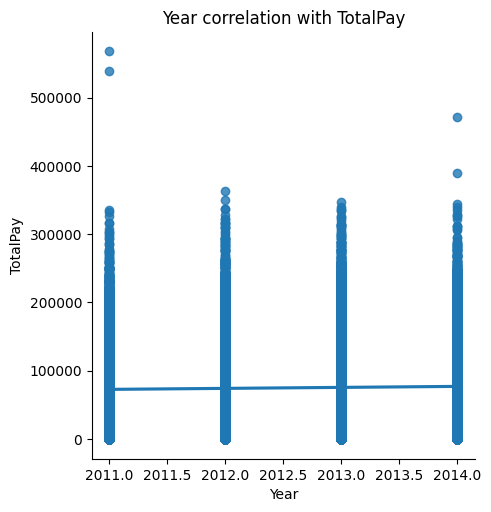

In [21]:
for i in df.select_dtypes(include=np.number).columns:
 sns.lmplot(x=i, y="TotalPay",  data=df ).set(title=f'{i} correlation with TotalPay')


---

##### 7. **Summary of Insights**

* The average **"TotalPay"** varies across different departments, with the Fire Department having the highest average total pay (151,685.81), followed by the Police Department (107,437.15). The Human Resources department has the lowest average total pay (9,316.12).

* **"TotalPay"** has a strong positive correlation with **"BasePay"** (0.95), a moderate positive correlation with **"OvertimePay"** (0.50), **"OtherPay"** (0.47), and **"Benefits"** (0.63). Additionally, **"TotalPay"** is highly positively correlated with **"TotalPayBenefits"** (0.98), indicating that these two variables move closely together.

* According to the data, most employees' total pay amounts fall between $36,168.99 and $105,839.14, with some extreme values going as high as $567,595.43. More research is necessary to determine the nature of the negative minimum and mode of 0.0 in **"totalPay"**. 

---